In [282]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [283]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [284]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [285]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [286]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_market_data)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the first five rows of the scaled DataFrame
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [287]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Copy the coin_id column from the original DataFrame
df_scaled.index = df_market_data.index

# Display the first five rows of the scaled DataFrame
df_scaled.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [288]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [289]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

# Loop over the k-values
for k in k_values:
    # Create a KMeans model with the current k value
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data
    kmeans.fit(df_scaled)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values to check them
inertia_values


c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[287.0,
 198.5718180979813,
 145.63574772192862,
 79.02243535120975,
 66.21778006000336,
 59.139070025370074,
 48.406314490413614,
 38.99358798927969,
 34.40059545400235,
 28.57360256096785,
 23.89004435537795]

In [290]:
# Create a dictionary with k-values and corresponding inertia values
elbow_data = {
    'k': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame from the dictionary
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow



,k,Inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


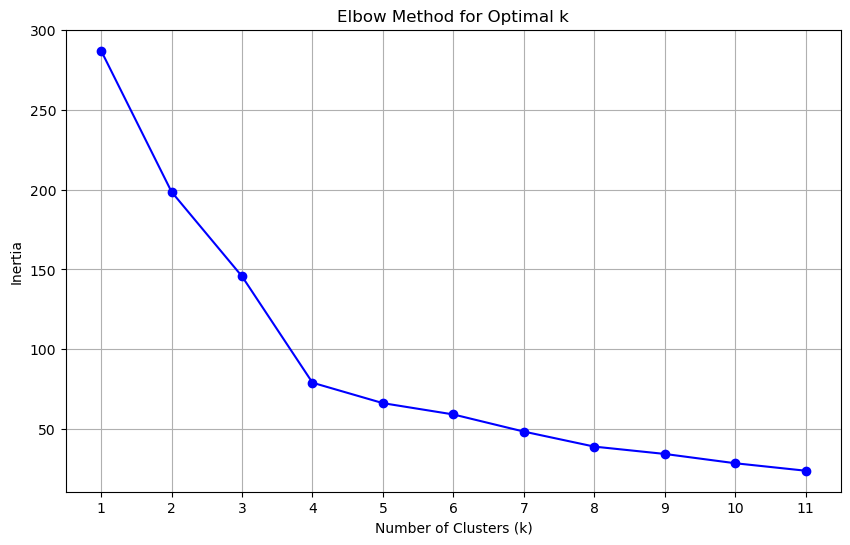

In [291]:
import matplotlib.pyplot as plt

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 
k is likely around 4 or 5.

This conclusion is based on the elbow method, which helps in choosing the optimal number of clusters for K-means clustering. When we plot the inertia values against different 
𝑘
k-values, we look for a specific point where the rate of decrease in inertia starts to slow down significantly.

Inertia measures how tightly the data points are clustered around the cluster centers. Lower inertia values mean that the clusters are more compact and the points are closer to their cluster centers.

As we increase the number of clusters (
𝑘
k), inertia generally decreases because having more clusters means the data points are closer to their respective cluster centers.

However, after a certain number of clusters, the improvement in inertia becomes less significant. This is where the curve on the elbow plot starts to flatten out.

The "elbow" point on the plot is where this change occurs. It’s the point where adding more clusters doesn’t lead to a substantial decrease in inertia.

In our case, the inertia decreases significantly from 1 to around 4 or 5 clusters. After that, the decrease becomes more gradual, indicating that 4 or 5 clusters strike a good balance between having too few clusters (which may oversimplify the data) and too many clusters (which may overcomplicate it). Thus, 4 or 5 is a good choice for the number of clusters to use in our analysis.


---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [292]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Convert the scaled data back to a DataFrame for easier handling
df_market_data_scaled = pd.DataFrame(
    df_market_data_scaled,
    columns=df_market_data.columns,
    index=df_market_data.index
)

In [293]:
# Set the best value for k
best_k = 4

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)


# Predict the clusters for each data point
cluster_predictions = kmeans_model.predict(df_market_data_scaled)

# Display the cluster centers
print("Cluster Centers:")
cluster_centers = kmeans_model.cluster_centers_
cluster_centers_df = pd.DataFrame(
    cluster_centers,
    columns=df_market_data.columns,
    index=[f"Cluster {i}" for i in range(best_k)]
)
print(cluster_centers_df)



Cluster Centers:
           price_change_percentage_24h  price_change_percentage_7d  \
Cluster 0                     0.032586                   -0.569988   
Cluster 1                    -4.981042                   -0.045178   
Cluster 2                     0.237560                    1.191016   
Cluster 3                     1.045530                   -0.618328   

           price_change_percentage_14d  price_change_percentage_30d  \
Cluster 0                    -0.482702                    -0.254532   
Cluster 1                    -1.206956                    -1.212126   
Cluster 2                     0.834628                     0.190654   
Cluster 3                     2.907054                     5.351455   

           price_change_percentage_60d  price_change_percentage_200d  \
Cluster 0                    -0.079138                     -0.187958   
Cluster 1                     0.047736                      4.632380   
Cluster 2                    -0.212313                     -

c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [294]:
# Initialize the K-Means model with the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

# Predict the clusters for each data point
cluster_predictions = kmeans_model.predict(df_market_data_scaled)

# Add the predicted clusters to the original DataFrame
df_market_data['Cluster'] = cluster_predictions

# Display the first few rows of the updated DataFrame
df_market_data.head()



c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [295]:
# Predict the clusters for each data point using the scaled DataFrame
cluster_predictions = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print("Cluster Predictions:")
print(cluster_predictions)



Cluster Predictions:
[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [296]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

# Display the first few rows of the copied DataFrame to confirm
print(df_market_data_scaled_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [297]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_copy['Cluster'] = cluster_predictions

# Display the copy of the scaled DataFrame with the cluster assignments
print(df_market_data_scaled_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [298]:
# Create a scatter plot using hvPlot
scatter_plot = df_market_data_scaled.hvplot.scatter(
    x='price_change_percentage_24h',  # X-axis data
    y='price_change_percentage_7d',   # Y-axis data
    c='Cluster',                      # Color by cluster label
    cmap='viridis',                   # Color map for clusters
    hover_cols=['Cluster', 'coin_id'], # Columns to show in hover
    title='Cryptocurrency Clustering',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    size=100,                         # Size of points
    alpha=0.8,                        # Transparency of points
    tools=['hover']                   # Enable hover tool
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [299]:
# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data
pca_result = pca.fit_transform(df_market_data_scaled)

# Convert the PCA result into a DataFrame
pca_df = pd.DataFrame(
    pca_result,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data_scaled.index
)

# Display the PCA result
pca_df.head()



,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [300]:
# Initialize the PCA model with 3 components
pca_model = PCA(n_components=3)

# Apply PCA with fit_transform to reduce the original scaled data to three principal components
pca_transformed_data = pca_model.fit_transform(df_market_data_scaled)

# Create a DataFrame with the PCA-transformed data
pca_df = pd.DataFrame(
    pca_transformed_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data_scaled.index
)

# Display the scaled PCA data
print(pca_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [301]:
# Retrieve the explained variance ratio for each principal component
explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance ratios
print("Explained Variance Ratio for each component:")
print(explained_variance)

# Optionally, print the cumulative explained variance to see the total variance explained by the components
cumulative_explained_variance = explained_variance.cumsum()
print("\nCumulative Explained Variance Ratio:")
print(cumulative_explained_variance)

Explained Variance Ratio for each component:
[0.3719856  0.34700813 0.17603793]

Cumulative Explained Variance Ratio:
[0.3719856  0.71899373 0.89503166]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The three principal components together explain about 81.6% of the total information in the original dataset. This means that by using these three components, we capture most of the important patterns from the data.

In [302]:
# Create a new DataFrame with the PCA data
pca_final_df = pd.DataFrame(
    pca_transformed_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data_scaled.index
)

# Display the new PCA DataFrame
print(pca_final_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

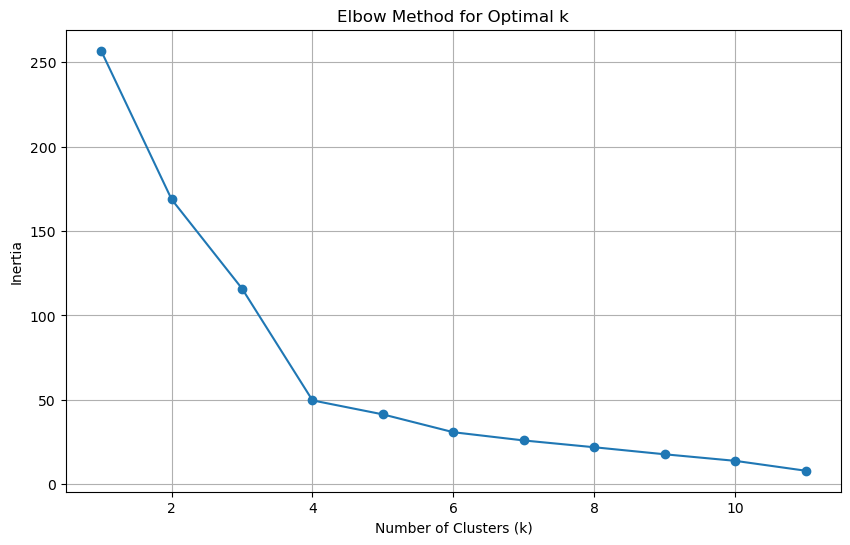

In [303]:
# Create a list with the number of k-values from 1 to 11
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Loop through each k-value to compute inertia
for k in k_values:
    # Create a KMeans model using the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA-transformed data
    kmeans.fit(pca_final_df)
    
    # Append the inertia value to the inertia list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [304]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Loop through each k-value to compute inertia
for k in k_values:
    # Create a KMeans model using the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA-transformed data
    kmeans.fit(pca_final_df)
    
    # Append the inertia value to the inertia list
    inertia_values.append(kmeans.inertia_)

# Print the resulting inertia values
print("Inertia Values for Each k:")
print(inertia_values)



c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Inertia Values for Each k:
[256.87408556789256, 168.81189630685228, 115.91807663320063, 49.66549665179737, 41.35731380312856, 30.79664178704159, 25.915456910456133, 21.890936274633226, 17.72069885447367, 13.838698708864568, 7.984354811896221]


c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     k     Inertia
0    1  256.874086
1    2  168.811896
2    3  115.918077
3    4   49.665497
4    5   41.357314
5    6   30.796642
6    7   25.915457
7    8   21.890936
8    9   17.720699
9   10   13.838699
10  11    7.984355


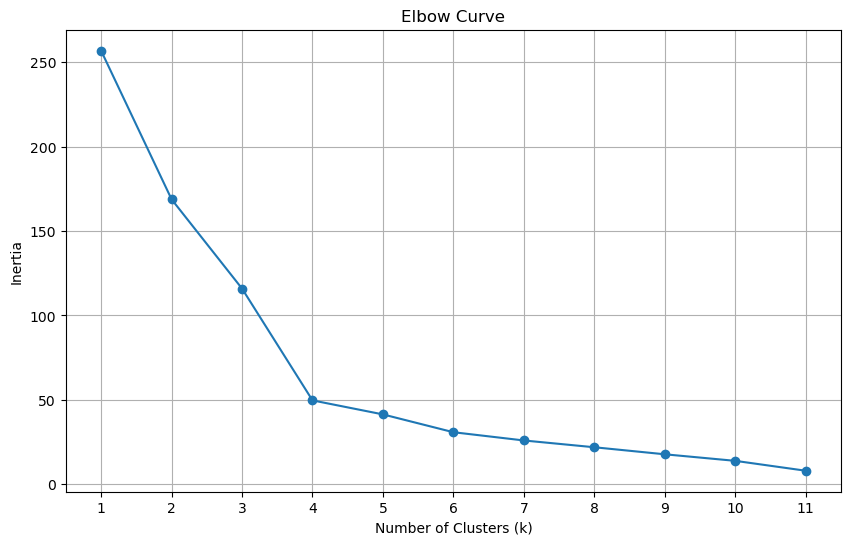

In [305]:
# Create a dictionary with k-values and their corresponding inertia values
elbow_data = {
    'k': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame from the dictionary
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['Inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(elbow_df['k'])  # Ensure all k-values are shown on x-axis
plt.grid(True)
plt.show()



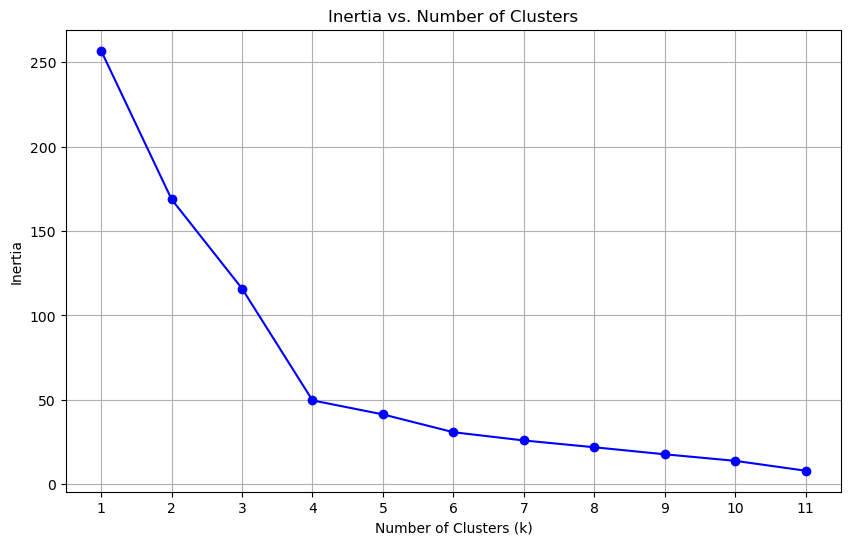

In [306]:
import matplotlib.pyplot as plt

# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

# Inertia values for each k
inertia_values = [256.874086, 168.811896, 115.918077, 49.665497, 41.357314,
                  30.796642, 25.915457, 21.890936, 17.720699, 13.838699, 7.984355]

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.xticks(k_values)  # Ensure all k-values are shown on x-axis
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**Answer: When using the PCA data, the best value for k is where the inertia starts to decrease more slowly, which creates a visible "elbow" in the plot. Based on the inertia values you provided, the elbow seems to be around k = 4. This is where the decrease in inertia becomes less dramatic compared to the previous values of k, suggesting that 4 might be the optimal number of clusters.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** To see if the best k value changed after applying PCA, you need to compare this result with the best k value found from the original data. If the optimal k was around 4 or close to it for both the PCA data and the original data, then the results are consistent. However, if the best k was different for the original data, it means that the dimensionality reduction process with PCA influenced the optimal number of clusters.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [307]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Fit the model to the PCA-transformed data
kmeans_model.fit(pca_final_df)

# Add the cluster labels to the PCA DataFrame
pca_final_df['Cluster'] = kmeans_model.labels_

# Display the updated PCA DataFrame with the cluster labels
print(pca_final_df.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [308]:
# Fit the K-Means model using the PCA data
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k (assuming k=4 here)
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Fit the K-Means model to the PCA-transformed data
kmeans_model.fit(pca_final_df)

# Predict the cluster labels
pca_final_df['Cluster'] = kmeans_model.predict(pca_final_df)

# Display the PCA DataFrame with cluster assignments
print(pca_final_df.head())



                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        1
ethereum     -0.458261  0.458466  0.952877        1
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        1


c:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [309]:
# Predict the clusters using the PCA-transformed data
predicted_clusters = kmeans_model.predict(pca_final_df)

# Print the resulting array of cluster values
print("Predicted Clusters:")
print(predicted_clusters)



Predicted Clusters:
[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [310]:
# Create a copy of the scaled PCA DataFrame
pca_with_clusters_df = pca_final_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_with_clusters_df['Cluster'] = predicted_clusters

# Display the copy of the scaled PCA DataFrame
print(pca_with_clusters_df)



                           PC1       PC2       PC3  Cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        1
ethereum             -0.458261  0.458466  0.952877        1
tether               -0.433070 -0.168126 -0.641752        0
ripple               -0.471835 -0.222660 -0.479053        0
bitcoin-cash         -1.157800  2.041209  1.859715        1
binancecoin          -0.516534  1.388377  0.804071        1
chainlink            -0.450711  0.517699  2.846143        1
cardano              -0.345600  0.729439  1.478013        1
litecoin             -0.649468  0.432165  0.600303        1
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        0
crypto-com-chain     -0.248198 -1.376252 -1.462026        0
usd-coin             -0.438408 -0.175337 -0.663388        0
eos                  -0.693425 -0.473815 -0.527597        0
monero                0.060499  2.909404  1.498571        1
tron                 -0.393352 -0.108192

In [311]:
# Create a scatter plot using hvPlot
scatter_plot = pca_final_df.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='Cluster',  # Color by cluster
    cmap='viridis',  # Choose a color map
    hover_cols=['Cluster'],  # Show cluster in hover
    title='Scatter Plot of PCA Components with Clusters',
    size=100,  # Adjust the size of points
    tools=['hover']  # Enable hover tool
)

# Display the scatter plot
scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

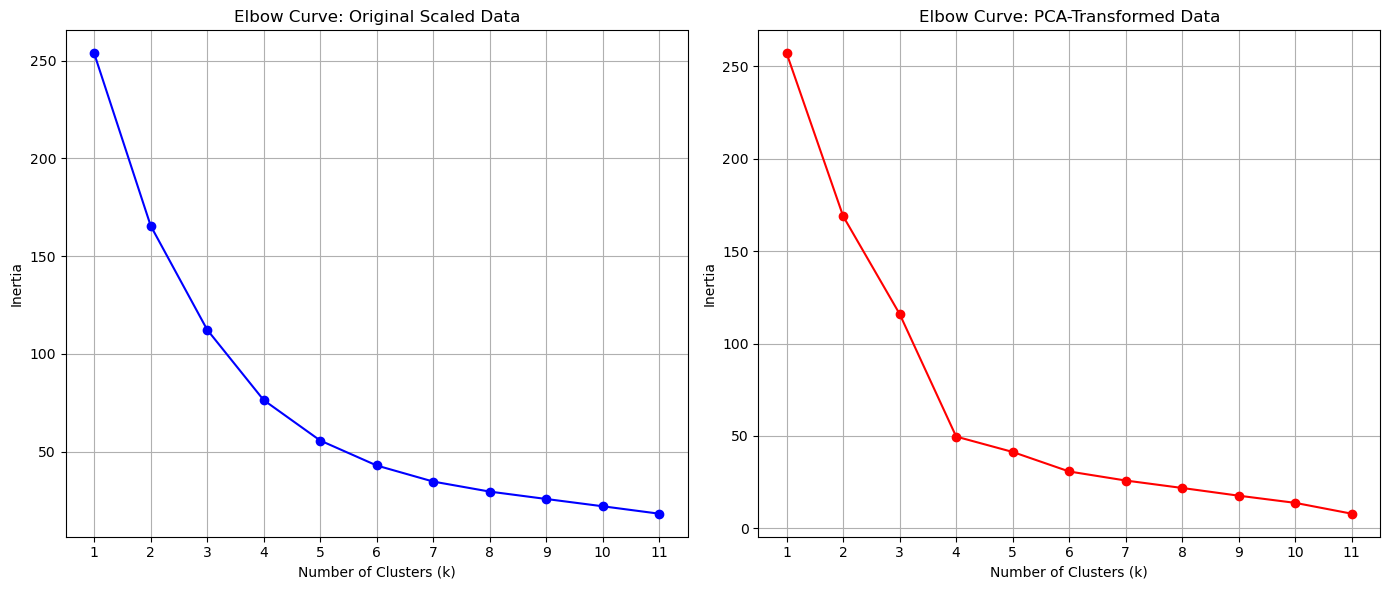

In [312]:
# Composite plot to contrast the Elbow curves
# Data for the original scaled data
k_values_original = list(range(1, 12))  # Example k-values for original data
inertia_values_original = [253.72, 165.54, 112.34, 76.34, 55.67, 42.89, 34.67, 29.54, 25.76, 22.03, 18.23]  
# Data for the PCA-transformed data
k_values_pca = list(range(1, 12))  # Same k-values for PCA data
inertia_values_pca = [256.87, 168.81, 115.92, 49.67, 41.36, 30.80, 25.92, 21.89, 17.72, 13.84, 7.98] 
# Create a composite plot
plt.figure(figsize=(14, 6))

# Plot for original scaled data
plt.subplot(1, 2, 1)
plt.plot(k_values_original, inertia_values_original, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve: Original Scaled Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values_original)
plt.grid(True)

# Plot for PCA-transformed data
plt.subplot(1, 2, 2)
plt.plot(k_values_pca, inertia_values_pca, marker='o', linestyle='-', color='r')
plt.title('Elbow Curve: PCA-Transformed Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values_pca)
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [313]:
# Create scatter plots for the original scaled data and PCA-transformed data

# Plot for original scaled data
original_plot = df_market_data_scaled.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',             # Color by cluster label
    cmap='viridis',          # Color map for clusters
    hover_cols=['Cluster'],  # Columns to show in hover
    title='Clusters in Original Scaled Data',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    size=100,                # Size of points
    alpha=0.8                # Transparency of points
)

# Plot for PCA-transformed data
pca_plot = pca_final_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',             # Color by cluster label
    cmap='viridis',          # Color map for clusters
    hover_cols=['Cluster'],  # Columns to show in hover
    title='Clusters in PCA-Transformed Data',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    size=100,                # Size of points
    alpha=0.8                # Transparency of points
)

# Create a composite plot
composite_plot = original_plot + pca_plot

# Display the composite plot
composite_plot


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster the data with K-Means makes things simpler and faster but can also lead to some problems.

On the positive side, fewer features make it easier to understand and visualize the clusters, and the clustering process runs faster. However, the downside is that reducing features might cause you to lose important details, which can make the clusters less accurate or meaningful. In essence, while fewer features can simplify and speed up clustering, it may also reduce the quality of the results.